In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [309]:
Blood_Pressure_data = pd.read_csv('Blood_Pressure_data.csv')
Blood_Pressure_data

,id,patient_no,cast,gender,age group,weight,admission_typeid,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,Med,label
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>5
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>5
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [310]:
Blood_Pressure_data.head()

,id,patient_no,cast,gender,age group,weight,admission_typeid,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,Med,label
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>5
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [311]:
Blood_Pressure_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   id                        101766 non-null  int64 
 1   patient_no                101766 non-null  int64 
 2   cast                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age group                 101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_typeid          101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [312]:
Blood_Pressure_data.describe()

,id,patient_no,admission_typeid,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [313]:
Blood_Pressure_data.isnull().sum()

id                          0
patient_no                  0
cast                        0
gender                      0
age group                   0
weight                      0
admission_typeid            0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

In [314]:
Blood_Pressure_data.drop('id', inplace = True, axis = 1)

In [315]:
Blood_Pressure_data.drop('patient_no', inplace = True, axis = 1)

In [316]:
Blood_Pressure_data.drop('cast', inplace = True, axis = 1)

In [317]:
Blood_Pressure_data.drop('weight', inplace = True, axis = 1)

In [318]:
Blood_Pressure_data.drop('payer_code', inplace = True, axis = 1)

In [319]:
Blood_Pressure_data.drop('medical_specialty', inplace = True, axis = 1)

In [320]:
Blood_Pressure_data.drop('examide', inplace = True, axis = 1)

In [321]:
Blood_Pressure_data.drop('citoglipton', inplace = True, axis = 1)

In [322]:
Blood_Pressure_data

,gender,age group,admission_typeid,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,Med,label
0,Female,[0-10),6,25,1,1,41,0,1,0,...,No,No,No,No,No,No,No,No,No,NO
1,Female,[10-20),1,1,7,3,59,0,18,0,...,No,Up,No,No,No,No,No,Ch,Yes,>5
2,Female,[20-30),1,1,7,2,11,5,13,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,Male,[30-40),1,1,7,2,44,1,16,0,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Male,[40-50),1,1,7,1,51,0,8,0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,Male,[70-80),1,3,7,3,51,0,16,0,...,No,Down,No,No,No,No,No,Ch,Yes,>5
101762,Female,[80-90),1,4,5,5,33,3,18,0,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,Male,[70-80),1,1,7,1,53,0,9,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,Female,[80-90),2,3,7,10,45,2,21,0,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [323]:
Blood_Pressure_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 42 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   gender                    101766 non-null  object
 1   age group                 101766 non-null  object
 2   admission_typeid          101766 non-null  int64 
 3   discharge_disposition_id  101766 non-null  int64 
 4   admission_source_id       101766 non-null  int64 
 5   time_in_hospital          101766 non-null  int64 
 6   num_lab_procedures        101766 non-null  int64 
 7   num_procedures            101766 non-null  int64 
 8   num_medications           101766 non-null  int64 
 9   number_outpatient         101766 non-null  int64 
 10  number_emergency          101766 non-null  int64 
 11  number_inpatient          101766 non-null  int64 
 12  diag_1                    101766 non-null  object
 13  diag_2                    101766 non-null  object
 14  diag

In [324]:
dd = Blood_Pressure_data.drop("label", axis = 1)
y = Blood_Pressure_data["label"]
print('Shape of z: ',dd.shape)
print('Shape of y: ', y.shape)

Shape of z:  (101766, 41)
Shape of y:  (101766,)


In [325]:
le = LabelEncoder()

In [233]:
Blood_Pressure_data['gender'] = le.fit_transform(Blood_Pressure_data['gender'])

In [234]:
Blood_Pressure_data['age group'] = le.fit_transform(Blood_Pressure_data['age group'])

In [235]:
Blood_Pressure_data['max_glu_serum'] = le.fit_transform(Blood_Pressure_data['max_glu_serum'])

In [236]:
Blood_Pressure_data['A1Cresult'] = le.fit_transform(Blood_Pressure_data['A1Cresult'])

In [237]:
Blood_Pressure_data['metformin'] = le.fit_transform(Blood_Pressure_data['metformin'])

In [238]:
Blood_Pressure_data['repaglinide'] = le.fit_transform(Blood_Pressure_data['repaglinide'])

In [239]:
Blood_Pressure_data['nateglinide'] = le.fit_transform(Blood_Pressure_data['nateglinide'])

In [240]:
Blood_Pressure_data['chlorpropamide'] = le.fit_transform(Blood_Pressure_data['chlorpropamide'])

In [241]:
Blood_Pressure_data['glimepiride'] = le.fit_transform(Blood_Pressure_data['glimepiride'])

In [242]:
Blood_Pressure_data['acetohexamide'] = le.fit_transform(Blood_Pressure_data['acetohexamide'])

In [243]:
Blood_Pressure_data['glipizide'] = le.fit_transform(Blood_Pressure_data['glipizide'])

In [244]:
Blood_Pressure_data['glyburide'] = le.fit_transform(Blood_Pressure_data['glyburide'])

In [245]:
Blood_Pressure_data['pioglitazone'] = le.fit_transform(Blood_Pressure_data['pioglitazone'])

In [246]:
Blood_Pressure_data['rosiglitazone'] = le.fit_transform(Blood_Pressure_data['rosiglitazone'])

In [247]:
Blood_Pressure_data['acarbose'] = le.fit_transform(Blood_Pressure_data['acarbose'])

In [248]:
Blood_Pressure_data['miglitol'] = le.fit_transform(Blood_Pressure_data['miglitol'])

In [249]:
Blood_Pressure_data['tolazamide'] = le.fit_transform(Blood_Pressure_data['tolazamide'])

In [250]:
Blood_Pressure_data['insulin'] = le.fit_transform(Blood_Pressure_data['insulin'])

In [251]:
Blood_Pressure_data['glyburide-metformin'] = le.fit_transform(Blood_Pressure_data['glyburide-metformin'])

In [252]:
Blood_Pressure_data['change'] = le.fit_transform(Blood_Pressure_data['change'])

In [253]:
Blood_Pressure_data['Med'] = le.fit_transform(Blood_Pressure_data['Med'])

In [254]:
Blood_Pressure_data['label'] = le.fit_transform(Blood_Pressure_data['label'])

In [255]:
Blood_Pressure_data['admission_typeid'] = le.fit_transform(Blood_Pressure_data['admission_typeid'])

In [256]:
Blood_Pressure_data['discharge_disposition_id'] = le.fit_transform(Blood_Pressure_data['discharge_disposition_id'])

In [257]:
Blood_Pressure_data['admission_source_id'] = le.fit_transform(Blood_Pressure_data['admission_source_id'])

In [258]:
Blood_Pressure_data['time_in_hospital'] = le.fit_transform(Blood_Pressure_data['time_in_hospital'])

In [259]:
Blood_Pressure_data['num_lab_procedures'] = le.fit_transform(Blood_Pressure_data['num_lab_procedures'])

In [260]:
Blood_Pressure_data['num_procedures'] = le.fit_transform(Blood_Pressure_data['num_procedures'])

In [261]:
Blood_Pressure_data['num_medications'] = le.fit_transform(Blood_Pressure_data['num_medications'])

In [262]:
Blood_Pressure_data['number_outpatient'] = le.fit_transform(Blood_Pressure_data['number_outpatient'])

In [263]:
Blood_Pressure_data['number_emergency'] = le.fit_transform(Blood_Pressure_data['number_emergency'])

In [264]:
Blood_Pressure_data['number_inpatient'] = le.fit_transform(Blood_Pressure_data['number_inpatient'])

In [265]:
Blood_Pressure_data['number_diagnoses'] = le.fit_transform(Blood_Pressure_data['number_diagnoses'])

In [266]:
Blood_Pressure_data['tolbutamide'] = le.fit_transform(Blood_Pressure_data['tolbutamide'])

In [267]:
Blood_Pressure_data['troglitazone'] = le.fit_transform(Blood_Pressure_data['troglitazone'])

In [268]:
Blood_Pressure_data['diag_1'] = le.fit_transform(Blood_Pressure_data['diag_1'])

In [269]:
Blood_Pressure_data['diag_2'] = le.fit_transform(Blood_Pressure_data['diag_2'])

In [270]:
Blood_Pressure_data['diag_3'] = le.fit_transform(Blood_Pressure_data['diag_3'])

In [271]:
Blood_Pressure_data['glipizide-metformin'] = le.fit_transform(Blood_Pressure_data['glipizide-metformin'])

In [272]:
Blood_Pressure_data['glimepiride-pioglitazone'] = le.fit_transform(Blood_Pressure_data['glimepiride-pioglitazone'])

In [273]:
Blood_Pressure_data['metformin-rosiglitazone'] = le.fit_transform(Blood_Pressure_data['metformin-rosiglitazone'])

In [274]:
Blood_Pressure_data['metformin-pioglitazone'] = le.fit_transform(Blood_Pressure_data['metformin-pioglitazone'])

In [275]:
Blood_Pressure_data

,gender,age group,admission_typeid,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,Med,label
0,0,0,5,23,0,0,40,0,0,0,...,0,1,1,0,0,0,0,1,0,2
1,0,1,0,0,6,2,58,0,17,0,...,0,3,1,0,0,0,0,0,1,1
2,0,2,0,0,6,1,10,5,12,2,...,0,1,1,0,0,0,0,1,1,2
3,1,3,0,0,6,1,43,1,15,0,...,0,3,1,0,0,0,0,0,1,2
4,1,4,0,0,6,0,50,0,7,0,...,0,2,1,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,1,7,0,2,6,2,50,0,15,0,...,0,0,1,0,0,0,0,0,1,1
101762,0,8,0,3,4,4,32,3,17,0,...,0,2,1,0,0,0,0,1,1,2
101763,1,7,0,0,6,0,52,0,8,1,...,0,0,1,0,0,0,0,0,1,2
101764,0,8,1,2,6,9,44,2,20,0,...,0,3,1,0,0,0,0,0,1,2


In [276]:
dd_train, dd_test, y_train, y_test = train_test_split(dd, y, test_size = 0.2, random_state = 60)
print('Shape of X_train: ', dd_train.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of X_test: ', dd_test.shape)
print('Shape of y_test: ', y_test.shape)

Shape of X_train:  (81412, 41)
Shape of y_train:  (81412,)
Shape of X_test:  (20354, 41)
Shape of y_test:  (20354,)


In [277]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [278]:
sc = StandardScaler()

sc.fit(dd_train)

dd_train_sc = sc.transform(dd_train)
dd_test_sc = sc.transform(dd_test)

In [279]:
dd_test[0:5]

,gender,age group,admission_typeid,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,Med
100502,1,7,0,0,6,4,39,1,16,0,...,0,0,1,1,0,0,0,0,1,1
52924,0,6,0,5,6,4,41,0,13,2,...,0,0,2,1,0,0,0,0,0,1
66002,1,6,2,0,0,2,46,3,30,0,...,0,0,2,1,0,0,0,0,0,1
7973,0,5,0,0,6,3,43,0,6,0,...,0,0,1,1,0,0,0,0,1,0
78285,0,6,0,0,6,1,61,0,12,1,...,0,0,2,1,0,0,0,0,1,1


In [280]:
dd_test_sc[0:5]

array([[ 1.08118560e+00,  5.64581845e-01, -7.08672655e-01,
        -5.21819059e-01,  4.11591862e-01,  2.00360992e-01,
        -1.58134515e-01, -1.99118822e-01,  1.19353434e-01,
        -2.92902858e-01, -2.35645672e-01, -5.06341514e-01,
         1.37129532e+00,  1.52250888e+00,  2.31544172e+00,
         8.15050653e-01,  5.15026607e-02,  2.04821793e-01,
        -4.50400254e-01, -1.13992187e-01, -8.09263522e-02,
        -2.74392519e-02, -2.08584757e-01, -3.50476139e-03,
         2.41629215e+00, -2.96589708e-01, -1.52785898e-02,
        -2.64897046e-01, -2.48079996e-01, -5.44560412e-02,
        -1.40336104e-02, -6.07049936e-03, -1.79193770e-02,
        -4.81744073e-01, -8.19762494e-02, -1.26375283e-02,
        -3.50476139e-03, -4.95651153e-03,  0.00000000e+00,
         9.25207806e-01,  5.46767708e-01],
       [-9.24819144e-01, -6.24386470e-02, -7.08672655e-01,
         4.45222594e-01,  4.11591862e-01,  2.00360992e-01,
        -5.64742935e-02, -7.84700643e-01, -2.49741823e-01,
         1.28

In [281]:
dd_train_sc =  pd.DataFrame(dd_train_sc)
dd_test_sc =  pd.DataFrame(dd_test_sc)

In [282]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report 

clf1 = RandomForestClassifier()
clf1.fit(dd_train_sc,y_train)
pred = clf1.predict(dd_test_sc)

print ("Accuracy: " , accuracy_score(y_test,pred) * 100)  
print("Report: \n", classification_report(y_test, pred))
print("F1 Score: ", f1_score(y_test, pred, average = 'macro') * 100)

Accuracy:  58.43568831679276
Report: 
               precision    recall  f1-score   support

           0       0.43      0.02      0.04      2226
           1       0.50      0.38      0.43      7116
           2       0.62      0.83      0.71     11012

    accuracy                           0.58     20354
   macro avg       0.52      0.41      0.39     20354
weighted avg       0.56      0.58      0.54     20354

F1 Score:  39.33525993137469


In [283]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report 

model2 = RandomForestClassifier()
model2.fit(dd_train,y_train)

predict = model2.predict(dd_test)
print("Accuracy: ", accuracy_score(y_test, predict) * 100)  
print("Report: \n", classification_report(y_test, pred))
print("F1 Score: ", f1_score(y_test, pred, average = 'macro') * 100)

Accuracy:  58.30794929743539
Report: 
               precision    recall  f1-score   support

           0       0.43      0.02      0.04      2226
           1       0.50      0.38      0.43      7116
           2       0.62      0.83      0.71     11012

    accuracy                           0.58     20354
   macro avg       0.52      0.41      0.39     20354
weighted avg       0.56      0.58      0.54     20354

F1 Score:  39.33525993137469


In [289]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report 

model1 = GaussianNB()
model1.fit(dd_train, y_train)
y_pred = model2.predict(dd_test)

print("Accuracy: ", accuracy_score(y_test, y_pred) * 100)  
print("Report: \n", classification_report(y_test, pred))
print("F1 Score: ", f1_score(y_test, pred, average = 'macro') * 100)

Accuracy:  58.42586223838067
Report: 
               precision    recall  f1-score   support

           0       0.48      0.03      0.05      2226
           1       0.50      0.37      0.43      7116
           2       0.61      0.83      0.71     11012

    accuracy                           0.58     20354
   macro avg       0.53      0.41      0.39     20354
weighted avg       0.56      0.58      0.54     20354

F1 Score:  39.49583309687082


GRAPH OF THE GIVEN DATA

In [284]:
import matplotlib.pyplot as plt

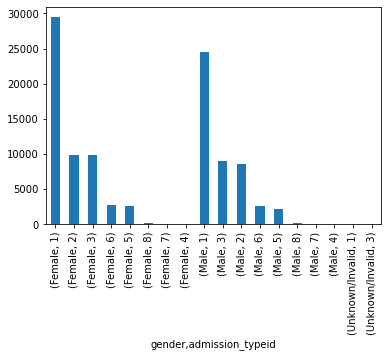

In [345]:
num = Blood_Pressure_data.groupby(['gender']).admission_typeid.value_counts()
num.plot(kind ='bar')

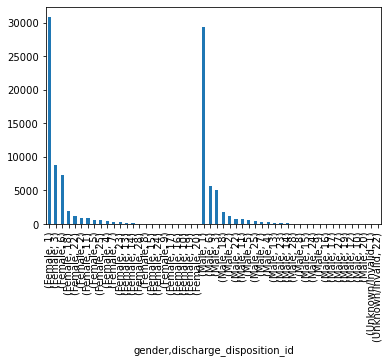

In [344]:
num = Blood_Pressure_data.groupby(['gender']).discharge_disposition_id.value_counts()
num.plot(kind ='bar')

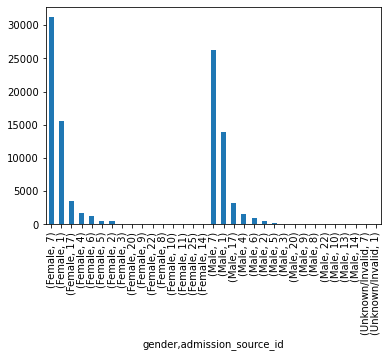

In [343]:
num = Blood_Pressure_data.groupby(['gender']).admission_source_id.value_counts()
num.plot(kind ='bar')

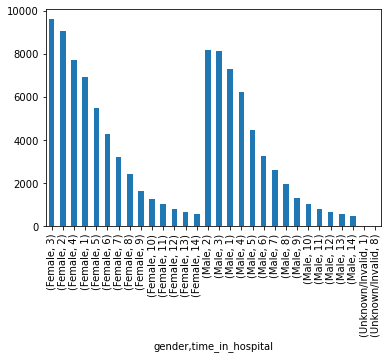

In [342]:
num = Blood_Pressure_data.groupby(['gender']).time_in_hospital.value_counts()
num.plot(kind ='bar')

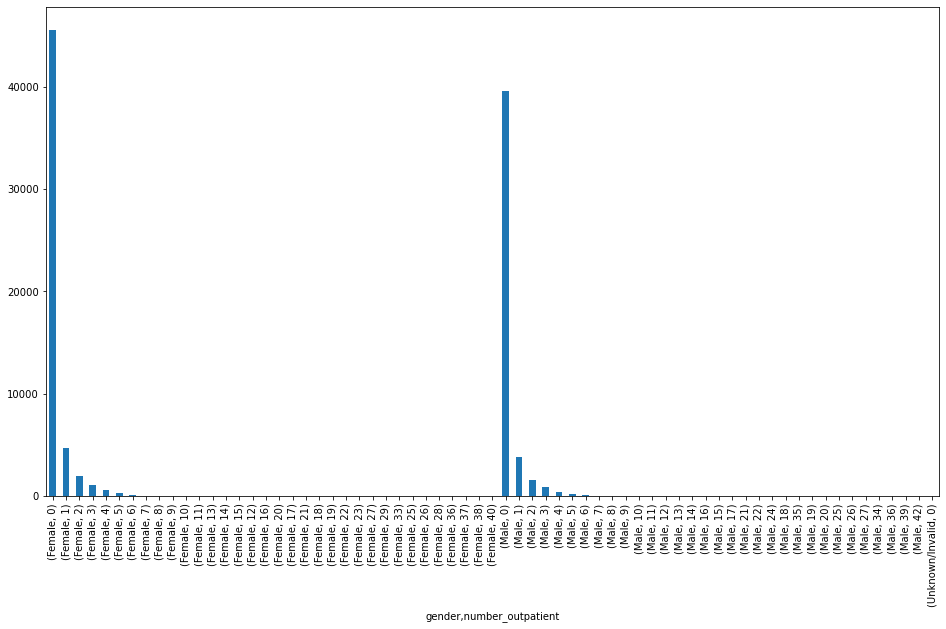

In [347]:
plt.figure(figsize=(16,9))
num = Blood_Pressure_data.groupby(['gender']).number_outpatient.value_counts()
num.plot(kind ='bar')

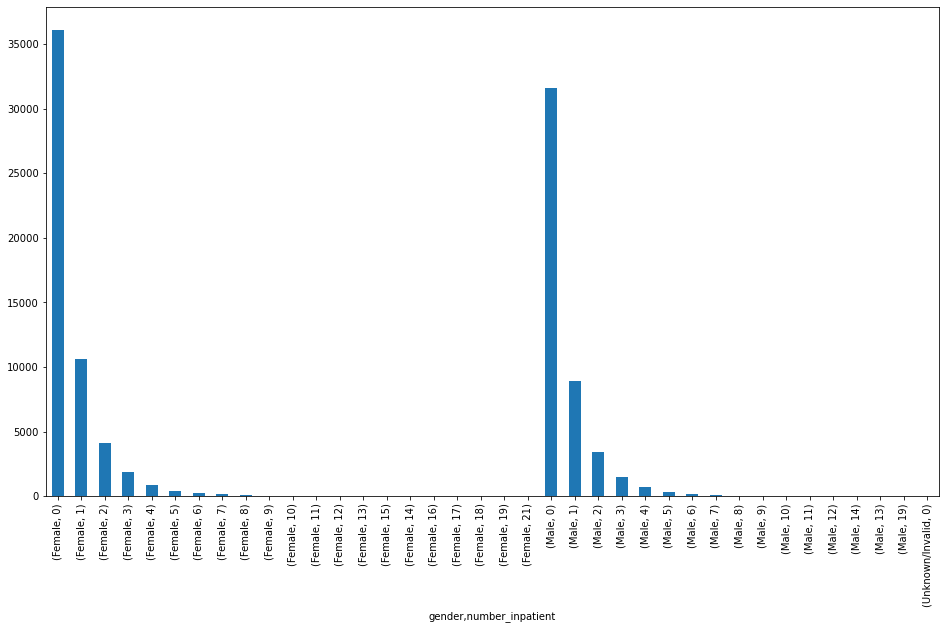

In [348]:
plt.figure(figsize=(16,9))
num = Blood_Pressure_data.groupby(['gender']).number_inpatient.value_counts()
num.plot(kind ='bar')

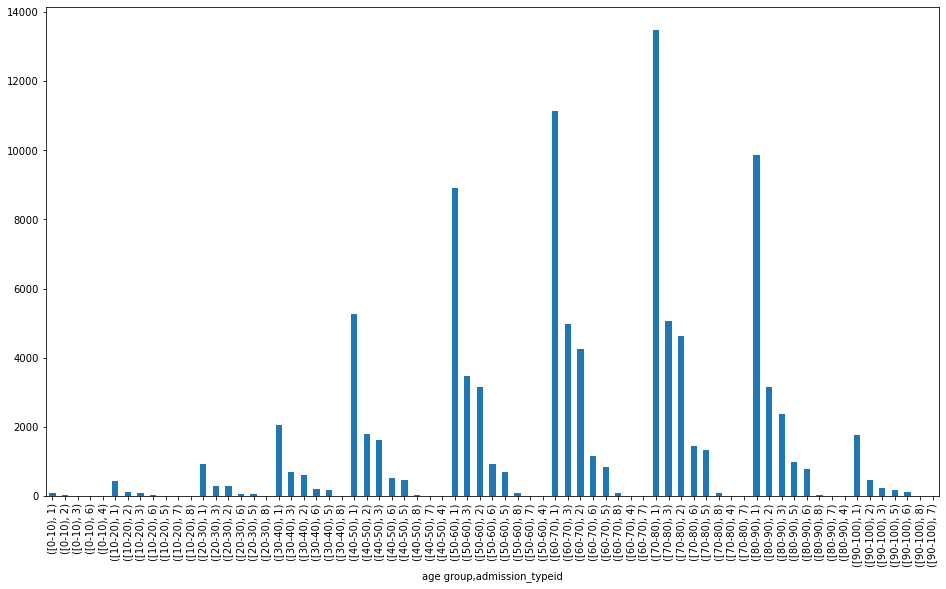

In [350]:
plt.figure(figsize=(16,9))
num = Blood_Pressure_data.groupby(['age group']).admission_typeid.value_counts()
num.plot(kind ='bar')

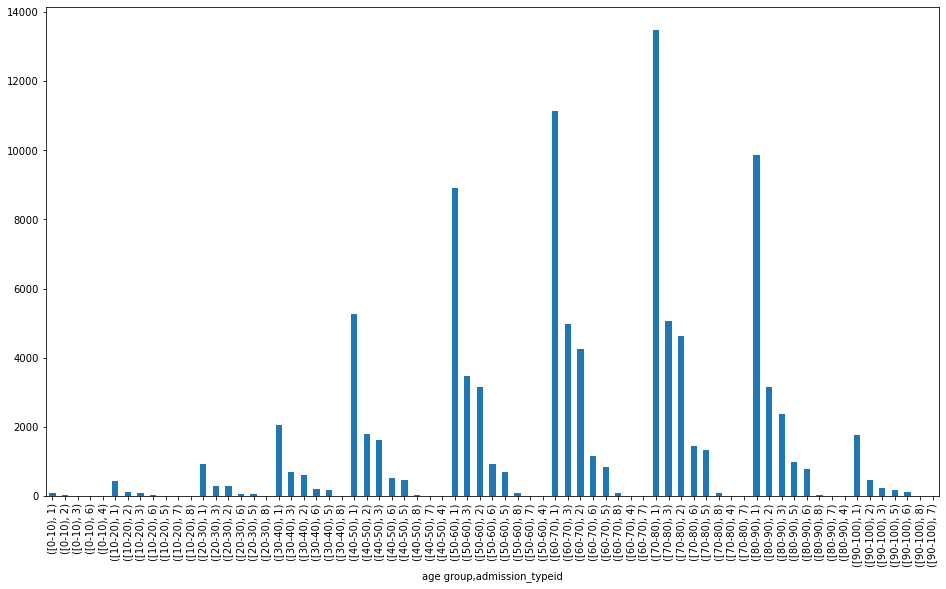

In [351]:
plt.figure(figsize=(16,9))
num = Blood_Pressure_data.groupby(['age group']).admission_typeid.value_counts()
num.plot(kind ='bar')

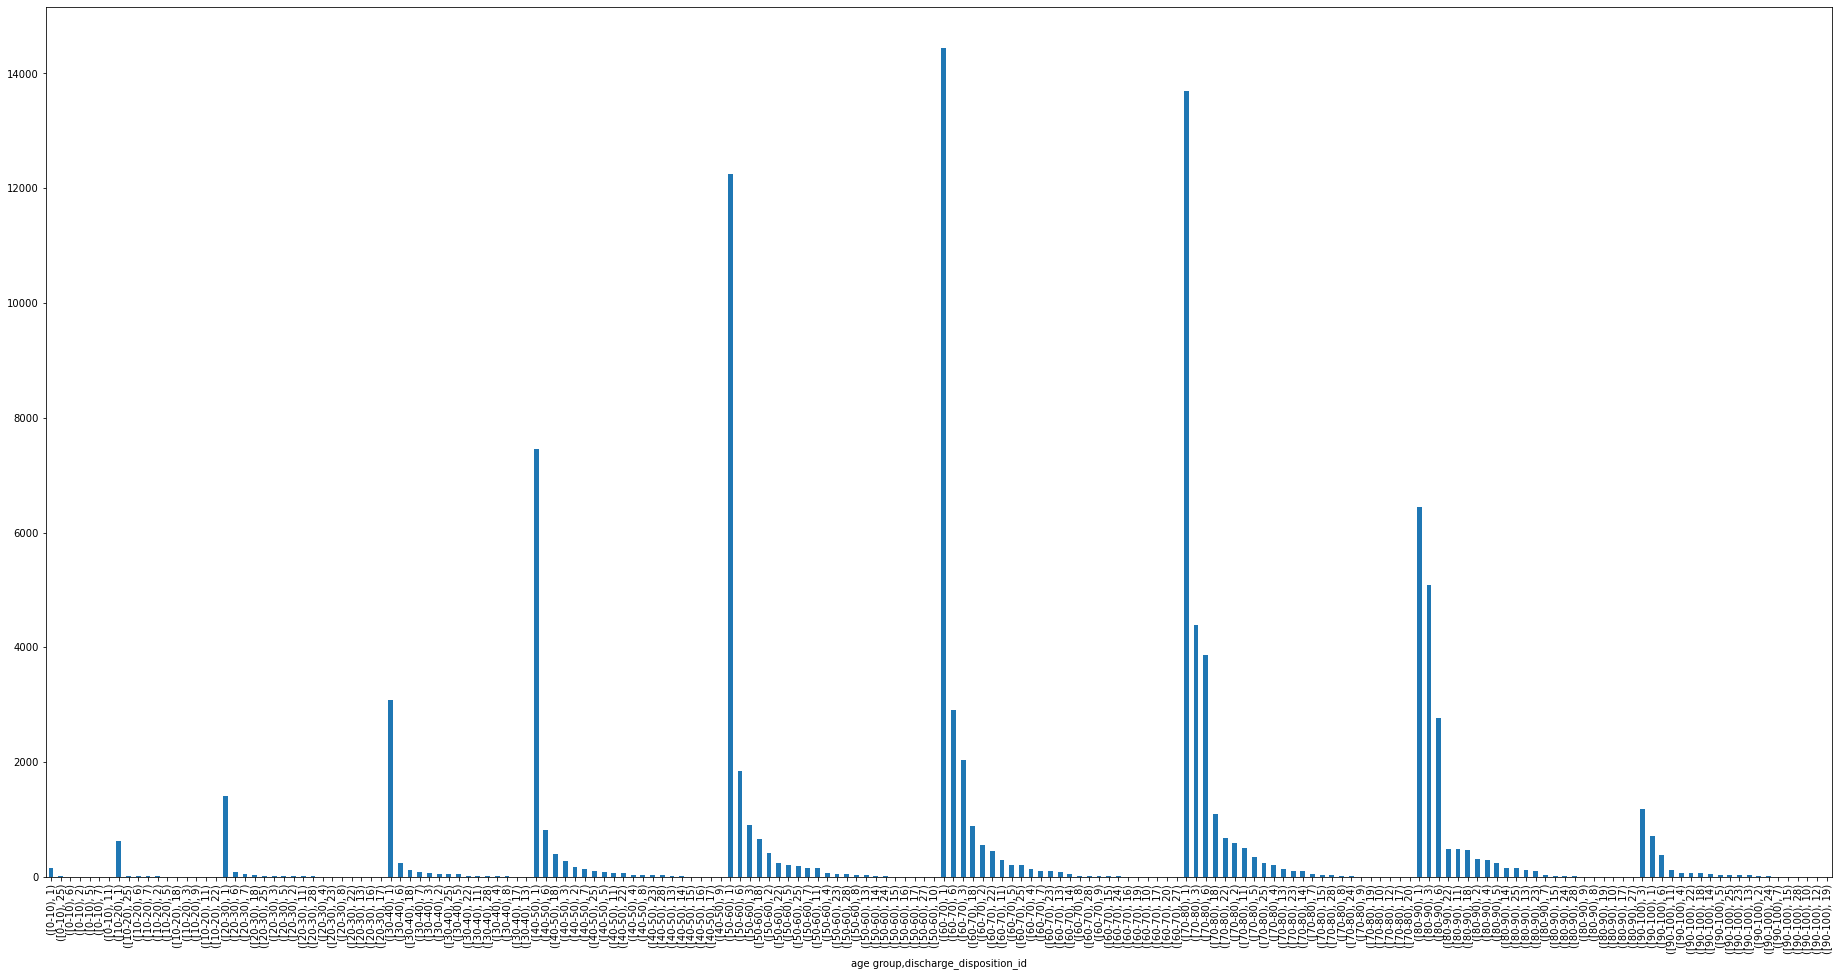

In [364]:
plt.figure(figsize=(32,16))
num = Blood_Pressure_data.groupby(['age group']).discharge_disposition_id.value_counts()
num.plot(kind ='bar')

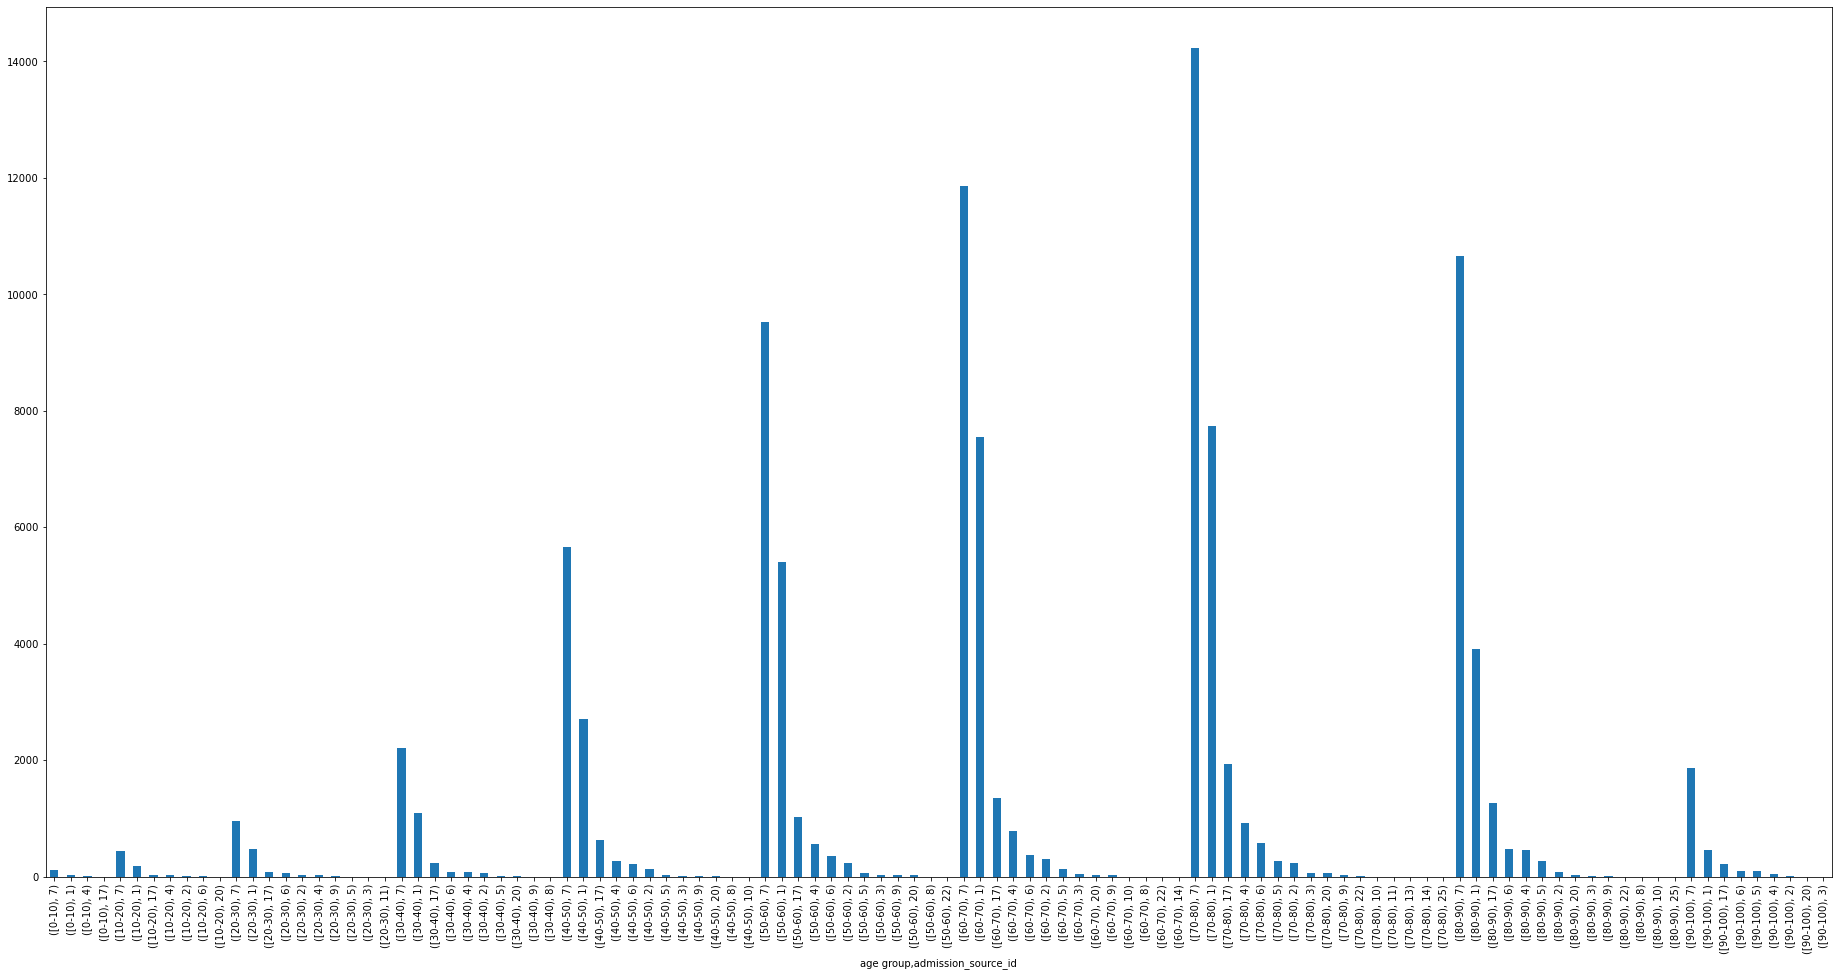

In [367]:
plt.figure(figsize=(32,16))
num = Blood_Pressure_data.groupby(['age group']).admission_source_id.value_counts()
num.plot(kind ='bar')

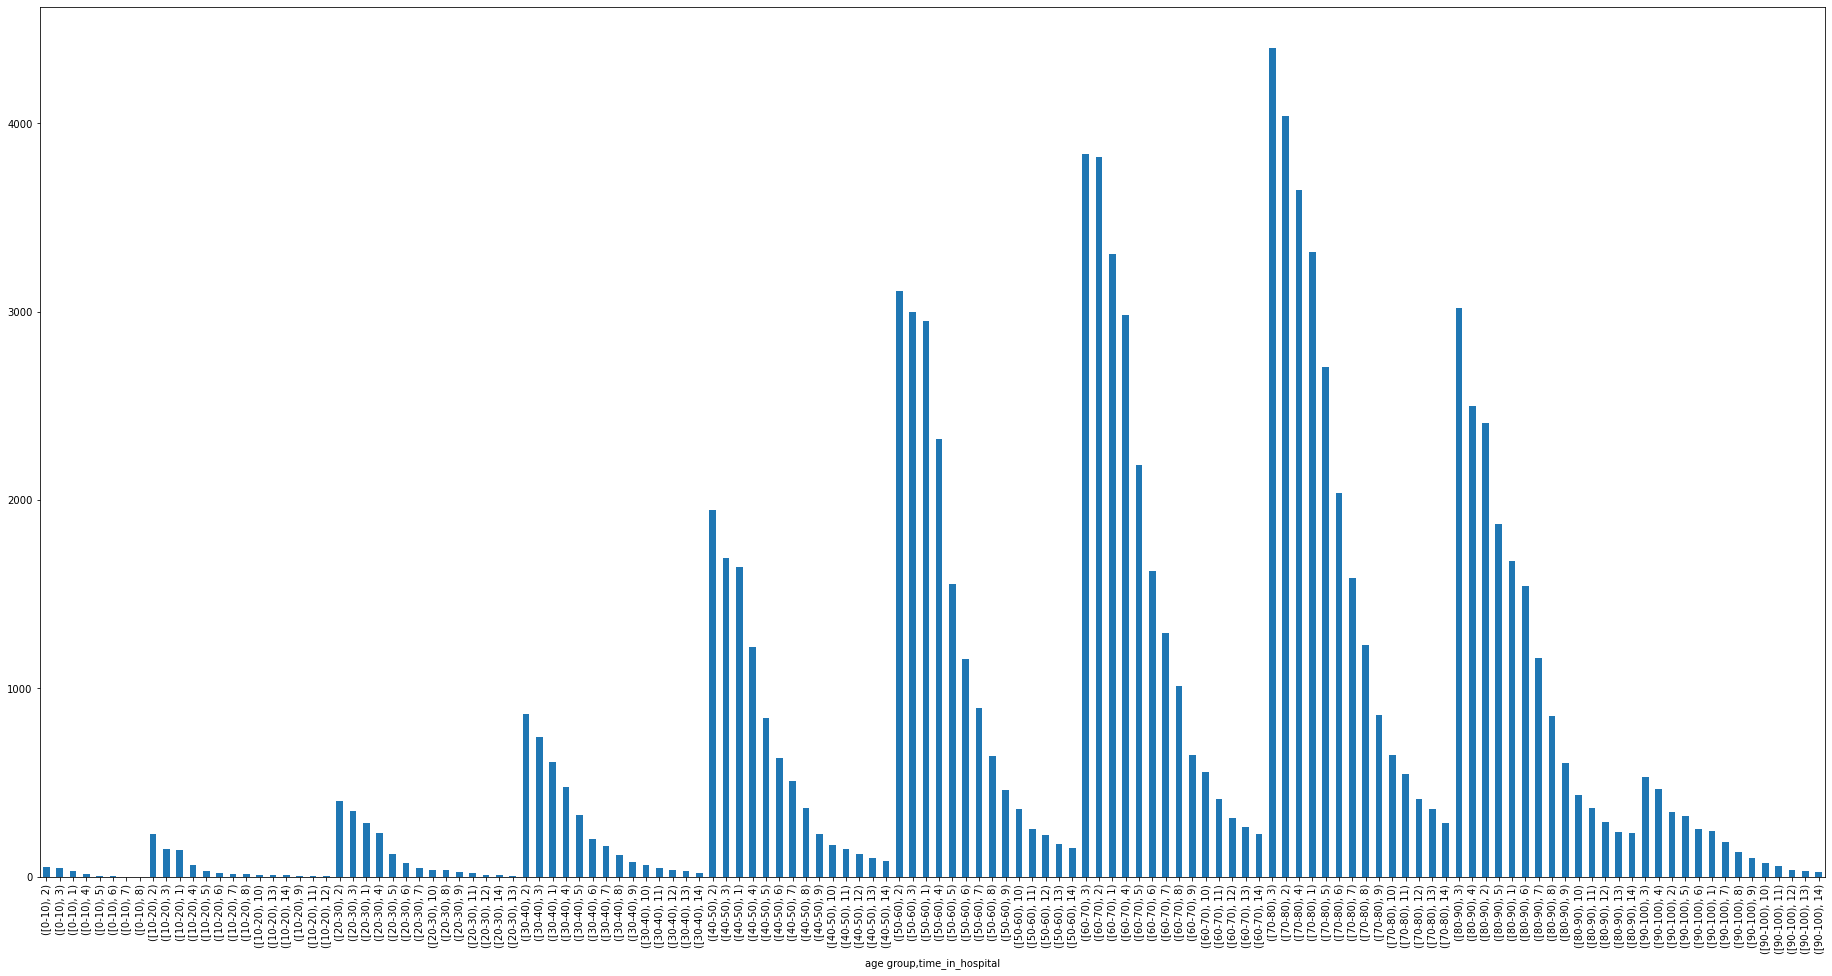

In [369]:
plt.figure(figsize=(32,16))
num = Blood_Pressure_data.groupby(['age group']).time_in_hospital.value_counts()
num.plot(kind ='bar')

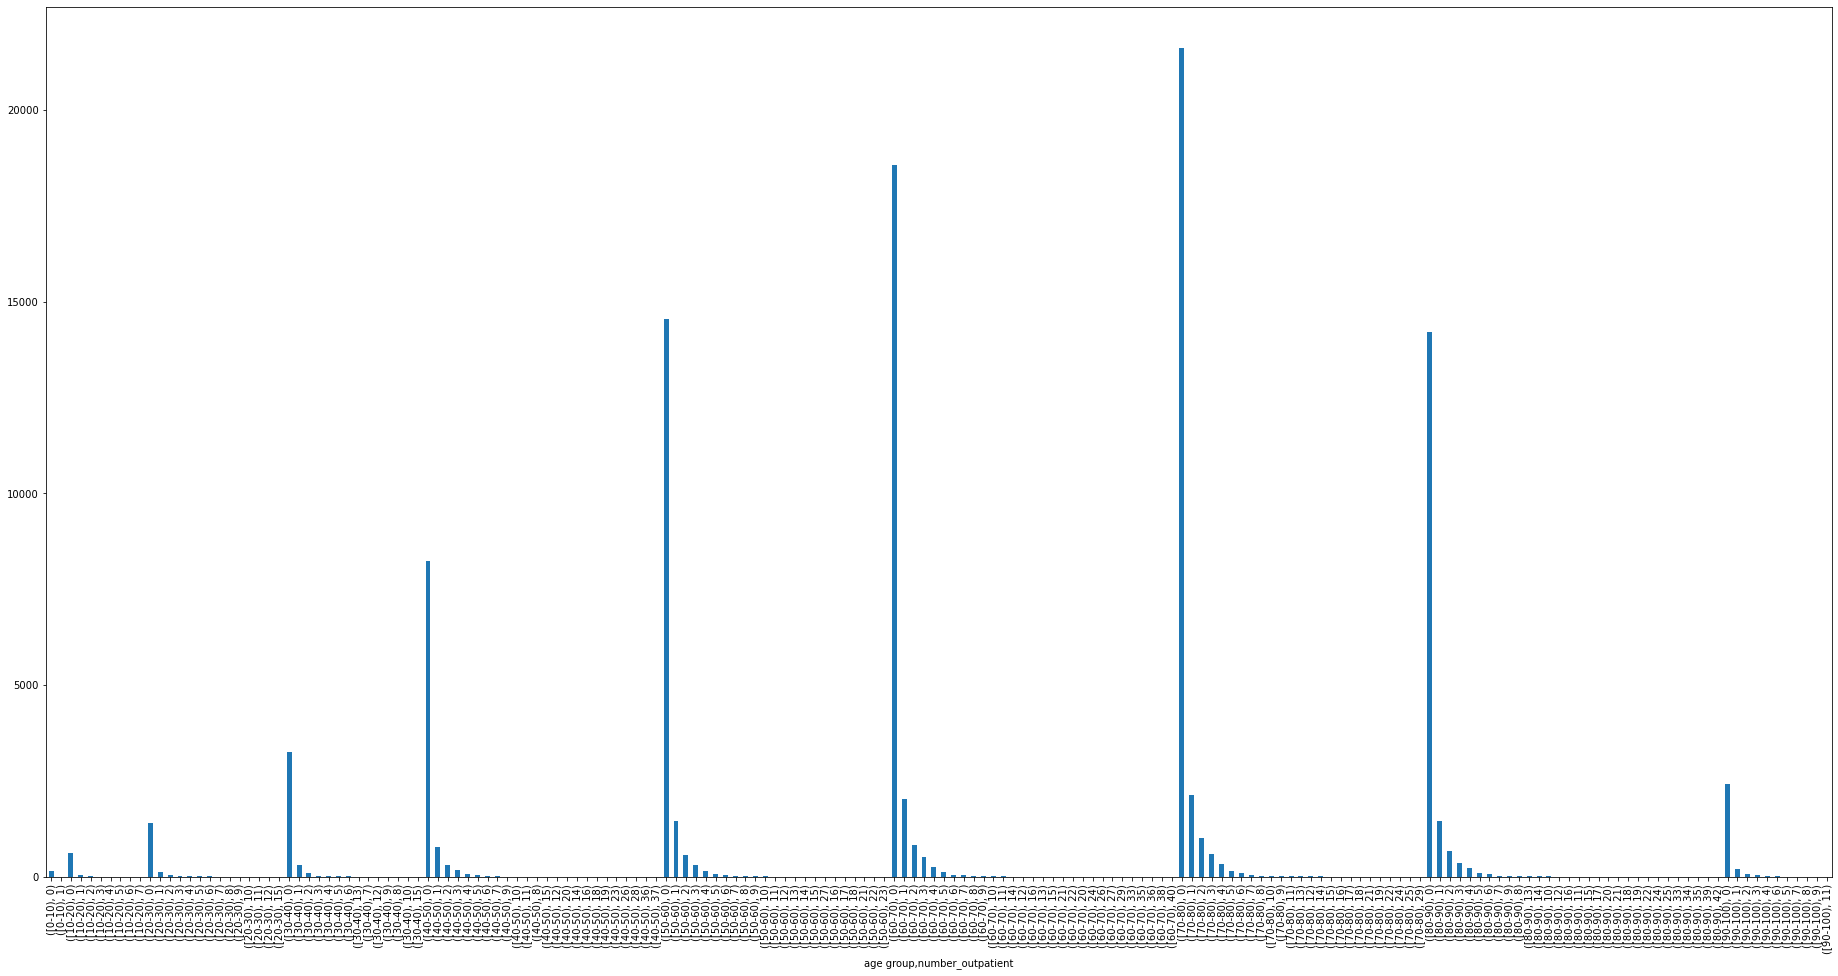

In [379]:
plt.figure(figsize=(32,16))
num = Blood_Pressure_data.groupby(['age group']).number_outpatient.value_counts()
num.plot(kind ='bar')

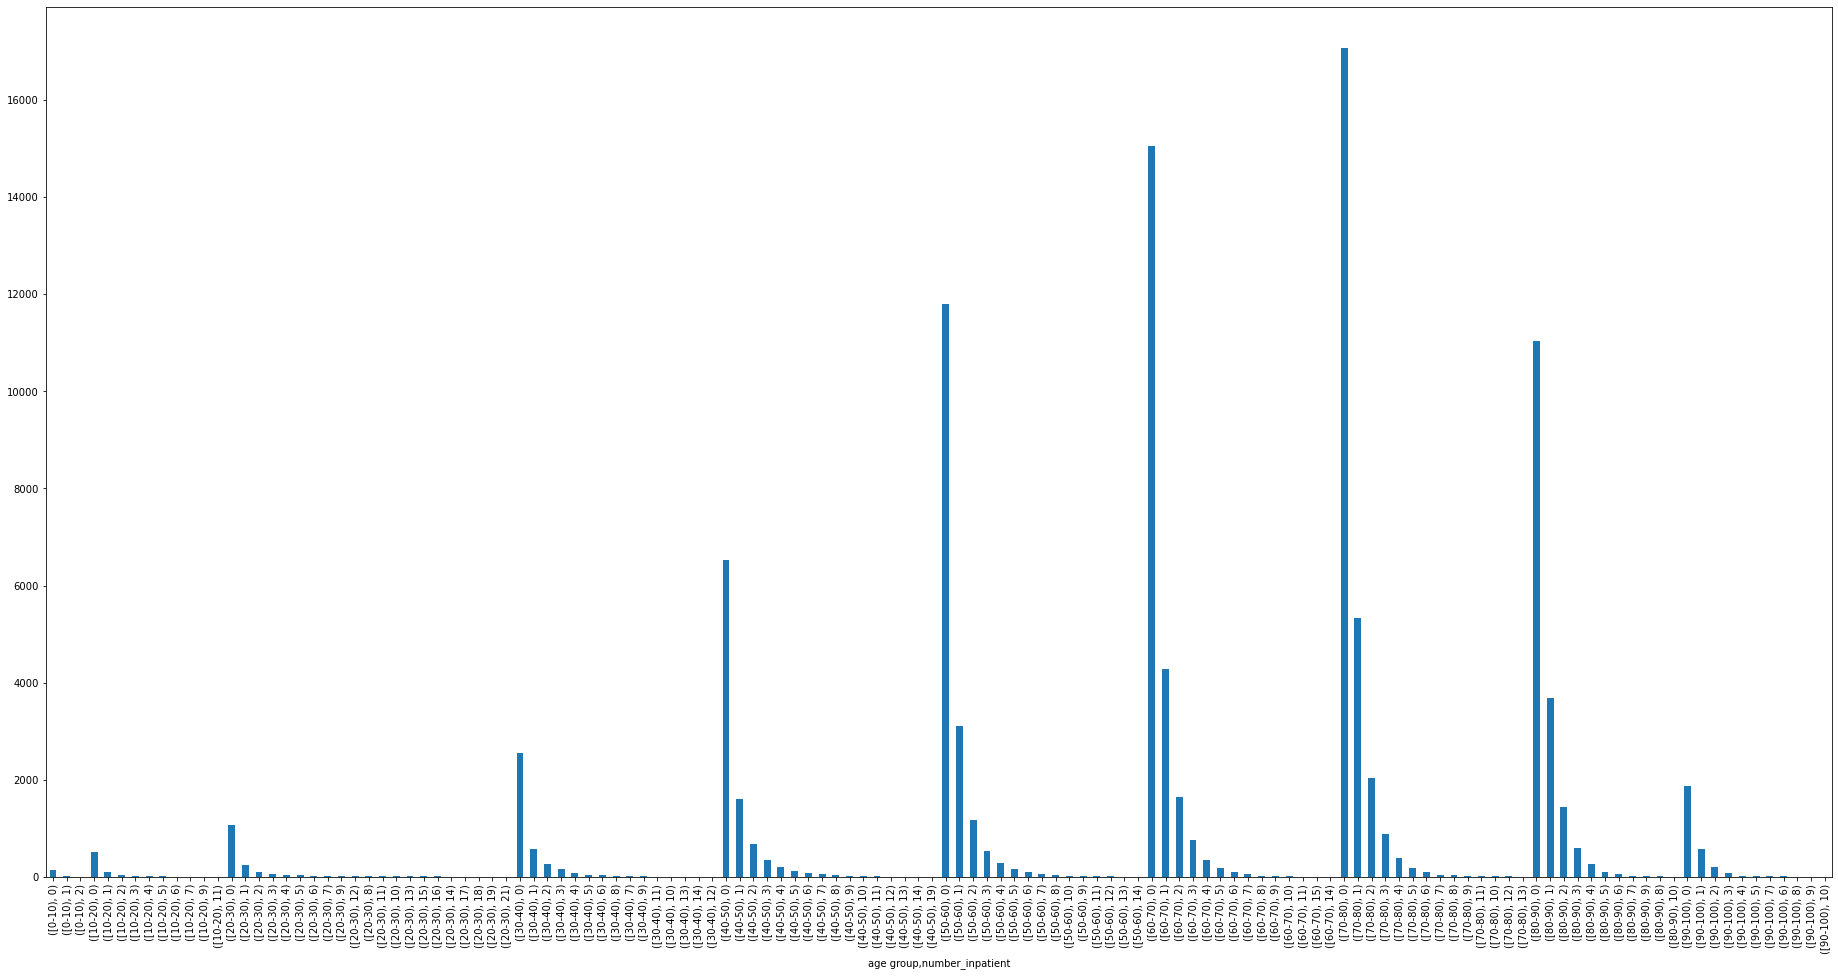

In [381]:
plt.figure(figsize=(32,16))
num = Blood_Pressure_data.groupby(['age group']).number_inpatient.value_counts()
num.plot(kind ='bar')

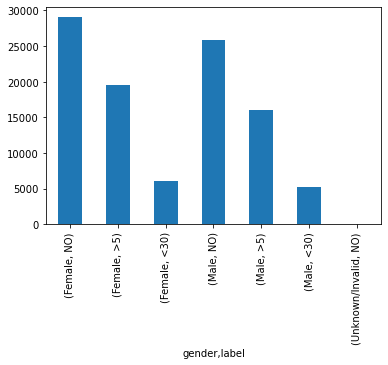

In [382]:
num = Blood_Pressure_data.groupby(['gender']).label.value_counts()
num.plot(kind ='bar')

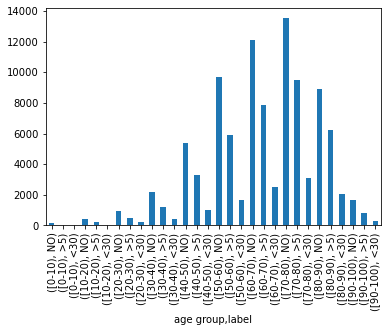

In [383]:
num = Blood_Pressure_data.groupby(['age group']).label.value_counts()
num.plot(kind ='bar')

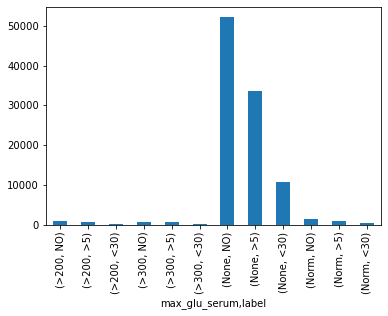

In [384]:
num = Blood_Pressure_data.groupby(['max_glu_serum']).label.value_counts()
num.plot(kind ='bar')

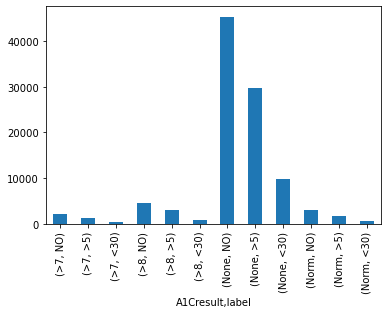

In [385]:
num = Blood_Pressure_data.groupby(['A1Cresult']).label.value_counts()
num.plot(kind ='bar')

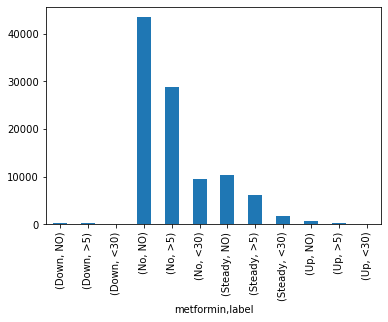

In [386]:
num = Blood_Pressure_data.groupby(['metformin']).label.value_counts()
num.plot(kind ='bar')

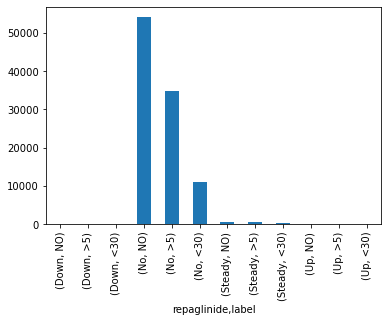

In [387]:
num = Blood_Pressure_data.groupby(['repaglinide']).label.value_counts()
num.plot(kind ='bar')

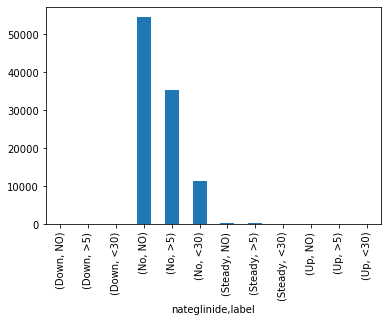

In [388]:
num = Blood_Pressure_data.groupby(['nateglinide']).label.value_counts()
num.plot(kind ='bar')

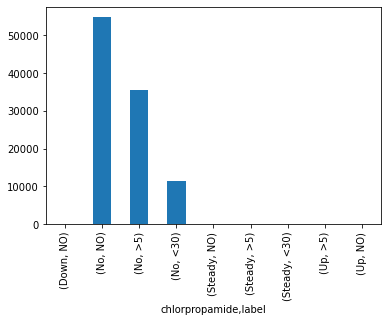

In [389]:
num = Blood_Pressure_data.groupby(['chlorpropamide']).label.value_counts()
num.plot(kind ='bar')

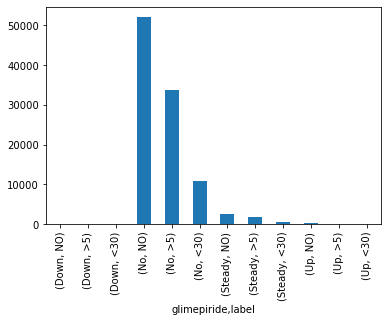

In [390]:
num = Blood_Pressure_data.groupby(['glimepiride']).label.value_counts()
num.plot(kind ='bar')

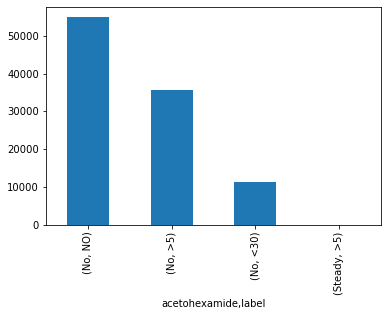

In [391]:
num = Blood_Pressure_data.groupby(['acetohexamide']).label.value_counts()
num.plot(kind ='bar')

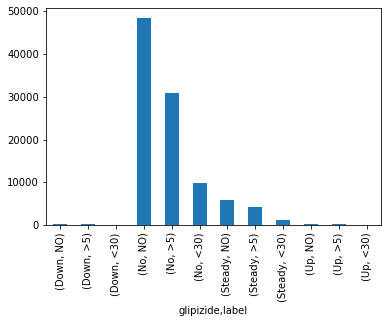

In [392]:
num = Blood_Pressure_data.groupby(['glipizide']).label.value_counts()
num.plot(kind ='bar')

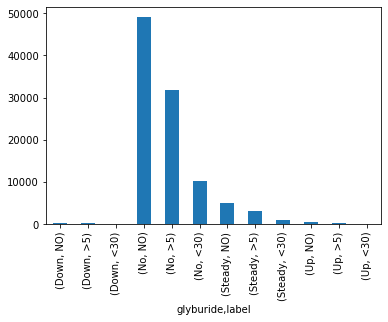

In [393]:
num = Blood_Pressure_data.groupby(['glyburide']).label.value_counts()
num.plot(kind ='bar')

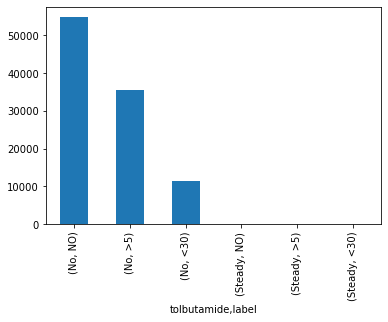

In [394]:
num = Blood_Pressure_data.groupby(['tolbutamide']).label.value_counts()
num.plot(kind ='bar')

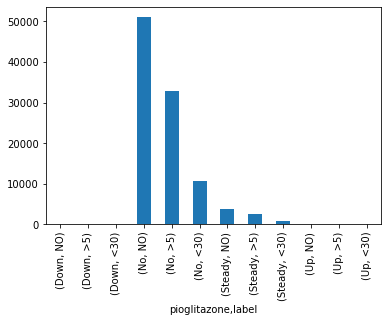

In [395]:
num = Blood_Pressure_data.groupby(['pioglitazone']).label.value_counts()
num.plot(kind ='bar')

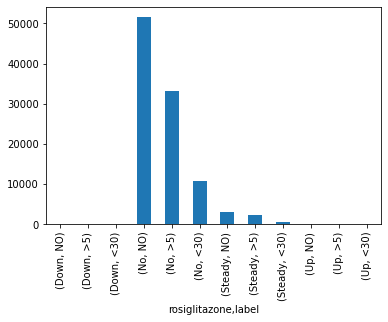

In [396]:
num = Blood_Pressure_data.groupby(['rosiglitazone']).label.value_counts()
num.plot(kind ='bar')

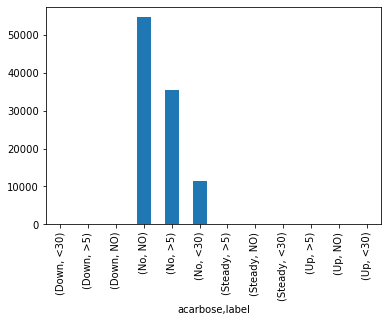

In [397]:
num = Blood_Pressure_data.groupby(['acarbose']).label.value_counts()
num.plot(kind ='bar')

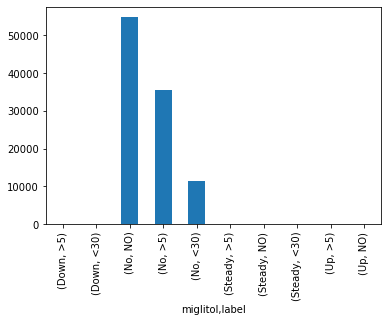

In [398]:
num = Blood_Pressure_data.groupby(['miglitol']).label.value_counts()
num.plot(kind ='bar')

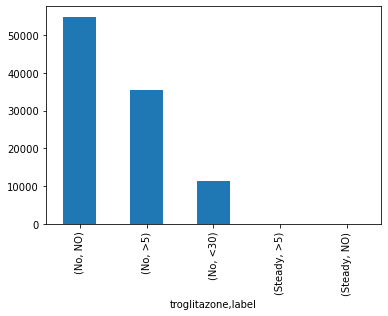

In [399]:
num = Blood_Pressure_data.groupby(['troglitazone']).label.value_counts()
num.plot(kind ='bar')

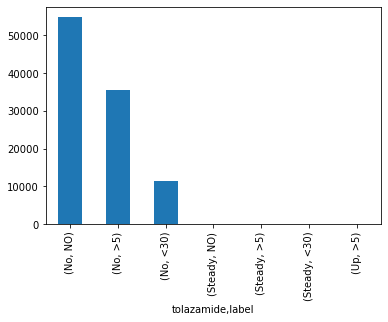

In [400]:
num = Blood_Pressure_data.groupby(['tolazamide']).label.value_counts()
num.plot(kind ='bar')

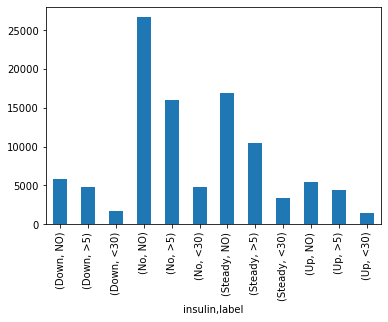

In [401]:
num = Blood_Pressure_data.groupby(['insulin']).label.value_counts()
num.plot(kind ='bar')

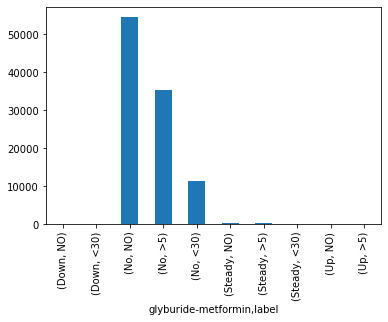

In [402]:
num = Blood_Pressure_data.groupby(['glyburide-metformin']).label.value_counts()
num.plot(kind ='bar')

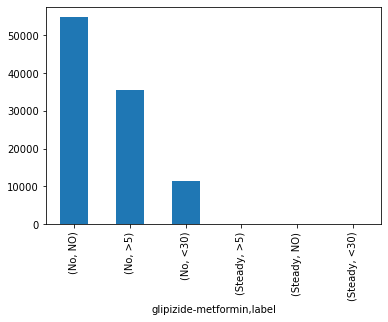

In [403]:
num = Blood_Pressure_data.groupby(['glipizide-metformin']).label.value_counts()
num.plot(kind ='bar')

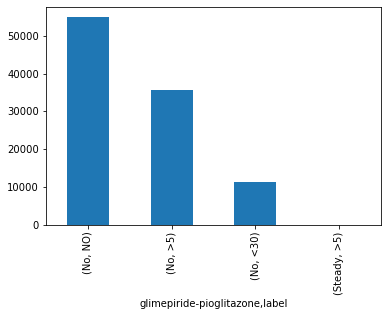

In [404]:
num = Blood_Pressure_data.groupby(['glimepiride-pioglitazone']).label.value_counts()
num.plot(kind ='bar')

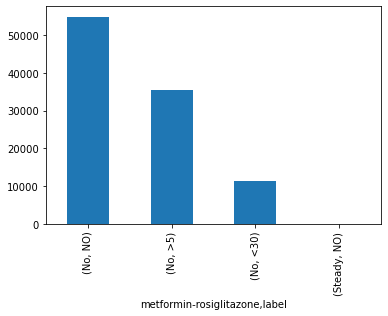

In [405]:
num = Blood_Pressure_data.groupby(['metformin-rosiglitazone']).label.value_counts()
num.plot(kind ='bar')

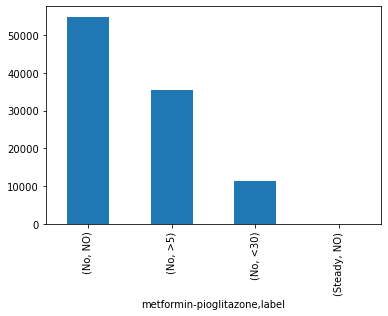

In [406]:
num = Blood_Pressure_data.groupby(['metformin-pioglitazone']).label.value_counts()
num.plot(kind ='bar')

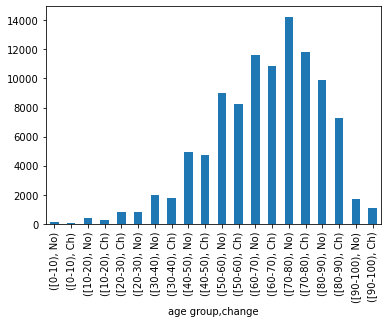

In [407]:
num = Blood_Pressure_data.groupby(['age group']).change.value_counts()
num.plot(kind ='bar')

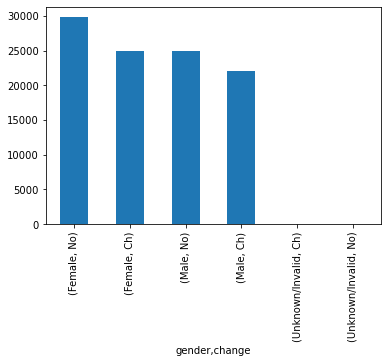

In [408]:
num = Blood_Pressure_data.groupby(['gender']).change.value_counts()
num.plot(kind ='bar')

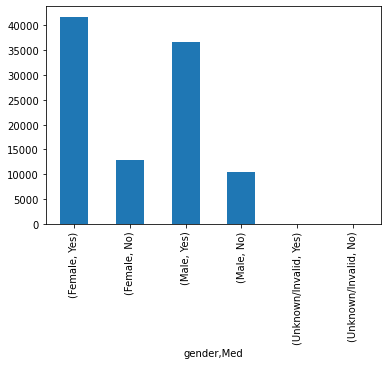

In [409]:
num = Blood_Pressure_data.groupby(['gender']).Med.value_counts()
num.plot(kind ='bar')

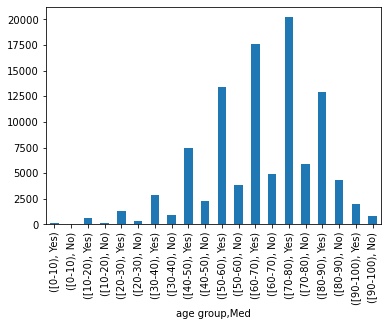

In [410]:
num = Blood_Pressure_data.groupby(['age group']).Med.value_counts()
num.plot(kind ='bar')